In [343]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from numpy import linalg as LA
import math

In [344]:
# reading the data

train_x_100_10 = pd.read_csv(r"C:\Users\rauna\OneDrive\Documents\Python Scripts\ml2\pp2data\pp2data\train-100-10.csv",header = None)
train_t_100_10 = pd.read_csv(r"C:\Users\rauna\OneDrive\Documents\Python Scripts\ml2\pp2data\pp2data\trainR-100-10.csv",header = None)

test_x_100_10 = pd.read_csv(r"C:\Users\rauna\OneDrive\Documents\Python Scripts\ml2\pp2data\pp2data\test-100-10.csv",header = None)
test_t_100_10 = pd.read_csv(r"C:\Users\rauna\OneDrive\Documents\Python Scripts\ml2\pp2data\pp2data\testR-100-10.csv",header = None)


train_x_100_100 = pd.read_csv(r"C:\Users\rauna\OneDrive\Documents\Python Scripts\ml2\pp2data\pp2data\train-100-100.csv",header = None)
train_t_100_100 = pd.read_csv(r"C:\Users\rauna\OneDrive\Documents\Python Scripts\ml2\pp2data\pp2data\trainR-100-100.csv",header = None)

test_x_100_100 = pd.read_csv(r"C:\Users\rauna\OneDrive\Documents\Python Scripts\ml2\pp2data\pp2data\test-100-100.csv",header = None)
test_t_100_100 = pd.read_csv(r"C:\Users\rauna\OneDrive\Documents\Python Scripts\ml2\pp2data\pp2data\testR-100-100.csv",header = None)


train_x_1000_100 = pd.read_csv(r"C:\Users\rauna\OneDrive\Documents\Python Scripts\ml2\pp2data\pp2data\train-1000-100.csv",header = None)
train_t_1000_100 = pd.read_csv(r"C:\Users\rauna\OneDrive\Documents\Python Scripts\ml2\pp2data\pp2data\trainR-1000-100.csv",header = None)

test_x_1000_100 = pd.read_csv(r"C:\Users\rauna\OneDrive\Documents\Python Scripts\ml2\pp2data\pp2data\test-1000-100.csv",header = None)
test_t_1000_100 = pd.read_csv(r"C:\Users\rauna\OneDrive\Documents\Python Scripts\ml2\pp2data\pp2data\testR-1000-100.csv",header = None)


train_x_crime = pd.read_csv(r"C:\Users\rauna\OneDrive\Documents\Python Scripts\ml2\pp2data\pp2data\train-crime.csv",header = None)
train_t_crime = pd.read_csv(r"C:\Users\rauna\OneDrive\Documents\Python Scripts\ml2\pp2data\pp2data\trainR-crime.csv",header = None)

test_x_crime = pd.read_csv(r"C:\Users\rauna\OneDrive\Documents\Python Scripts\ml2\pp2data\pp2data\test-crime.csv",header = None)
test_t_crime = pd.read_csv(r"C:\Users\rauna\OneDrive\Documents\Python Scripts\ml2\pp2data\pp2data\testR-crime.csv",header = None)


train_x_wine = pd.read_csv(r"C:\Users\rauna\OneDrive\Documents\Python Scripts\ml2\pp2data\pp2data\train-wine.csv",header = None)
train_t_wine = pd.read_csv(r"C:\Users\rauna\OneDrive\Documents\Python Scripts\ml2\pp2data\pp2data\trainR-wine.csv",header = None)

test_x_wine = pd.read_csv(r"C:\Users\rauna\OneDrive\Documents\Python Scripts\ml2\pp2data\pp2data\test-wine.csv",header = None)
test_t_wine = pd.read_csv(r"C:\Users\rauna\OneDrive\Documents\Python Scripts\ml2\pp2data\pp2data\testR-wine.csv",header = None)


train_f3 = pd.read_csv(r"C:\Users\rauna\OneDrive\Documents\Python Scripts\ml2\pp2data\pp2data\train-f3.csv",header = None)
trainR_f3 = pd.read_csv(r"C:\Users\rauna\OneDrive\Documents\Python Scripts\ml2\pp2data\pp2data\trainR-f3.csv",header = None)

test_f3 = pd.read_csv(r"C:\Users\rauna\OneDrive\Documents\Python Scripts\ml2\pp2data\pp2data\test-f3.csv",header = None)
testR_f3 = pd.read_csv(r"C:\Users\rauna\OneDrive\Documents\Python Scripts\ml2\pp2data\pp2data\testR-f3.csv",header = None)


train_f5 = pd.read_csv(r"C:\Users\rauna\OneDrive\Documents\Python Scripts\ml2\pp2data\pp2data\train-f5.csv",header = None)
trainR_f5 = pd.read_csv(r"C:\Users\rauna\OneDrive\Documents\Python Scripts\ml2\pp2data\pp2data\trainR-f5.csv",header = None)

test_f5 = pd.read_csv(r"C:\Users\rauna\OneDrive\Documents\Python Scripts\ml2\pp2data\pp2data\test-f5.csv",header = None)
testR_f5 = pd.read_csv(r"C:\Users\rauna\OneDrive\Documents\Python Scripts\ml2\pp2data\pp2data\testR-f5.csv",header = None)



In [345]:
# this function calculate the weight matrix using formula given in 3.28 
def find_w_parameter(x, t, lambda_term):
    df = (x.T).dot(x)
    df_inv = np.linalg.inv(lambda_term*np.identity(len(df))  + df.values)
    w = (df_inv.dot(x.T)).dot(t)
    return w 

In [346]:
#this function calculates the mean square error
def mean_square_error(x, w, t, lambda_term):
    error = np.mean(np.power(np.dot(x, w) - t, 2))                
    return error[0]

# TASK 1

In [347]:
# list to store the MSE values which will be used for plotting later

train_list_100_10 = []
test_list_100_10 = []

train_list_100_100 = []
test_list_100_100 = []

train_list_1000_100 = []
test_list_1000_100 = []

train_list_crime = []
test_list_crime = []

train_list_wine = []
test_list_wine = []

# we use this to find the minimum MSE on the test set
min_mse_100_10 = 100000
min_mse_100_100 = 100000
min_mse_1000_100 = 100000
min_mse_crime = 100000
min_mse_wine = 100000

lam_100_10 = 100000
lam_100_100 = 100000
lam_1000_100 = 100000
lam_crime = 100000
lam_wine = 100000

# calculate the MSE for each dataset for values of lambda in the range[0 - 150]
# also find the lambda value where MSE in min for the test set
for lam in range(150):
    
    w = find_w_parameter(train_x_100_10, train_t_100_10, lam)
    train_error = mean_square_error(train_x_100_10, w, train_t_100_10, lam)
    test_error = mean_square_error(test_x_100_10, w, test_t_100_10, lam)
    if(test_error < min_mse_100_10):
        min_mse_100_10 = test_error
        lam_100_10 = lam
    train_list_100_10.append(train_error)
    test_list_100_10.append(test_error)

    
for lam in range(150):
     
    w = find_w_parameter(train_x_100_100, train_t_100_100, lam)
    train_error = mean_square_error(train_x_100_100, w, train_t_100_100, lam)
    test_error = mean_square_error(test_x_100_100, w, test_t_100_100, lam)
    if(test_error < min_mse_100_100):
        min_mse_100_100 = test_error
        lam_100_100 = lam
    train_list_100_100.append(train_error)
    test_list_100_100.append(test_error)


for lam in range(150):
     
    w = find_w_parameter(train_x_1000_100, train_t_1000_100, lam)
    train_error = mean_square_error(train_x_1000_100, w, train_t_1000_100, lam)
    test_error = mean_square_error(test_x_1000_100, w, test_t_1000_100, lam)
    if(test_error < min_mse_1000_100):
        min_mse_1000_100 = test_error
        lam_1000_100 = lam
    train_list_1000_100.append(train_error)
    test_list_1000_100.append(test_error)


for lam in range(150):
     
    w = find_w_parameter(train_x_crime, train_t_crime, lam)
    train_error = mean_square_error(train_x_crime, w, train_t_crime, lam)
    test_error = mean_square_error(test_x_crime, w, test_t_crime, lam)
    if(test_error < min_mse_crime):
        min_mse_crime = test_error
        lam_crime = lam
    train_list_crime.append(train_error)
    test_list_crime.append(test_error)


for lam in range(150):
     
    w = find_w_parameter(train_x_wine, train_t_wine, lam)
    train_error = mean_square_error(train_x_wine, w, train_t_wine, lam)
    test_error = mean_square_error(test_x_wine, w, test_t_wine, lam)
    if(test_error < min_mse_wine):
        min_mse_wine = test_error
        lam_wine = lam
    train_list_wine.append(train_error)
    test_list_wine.append(test_error)

Blue line denotes train MSE
Orange line denotes test MSE


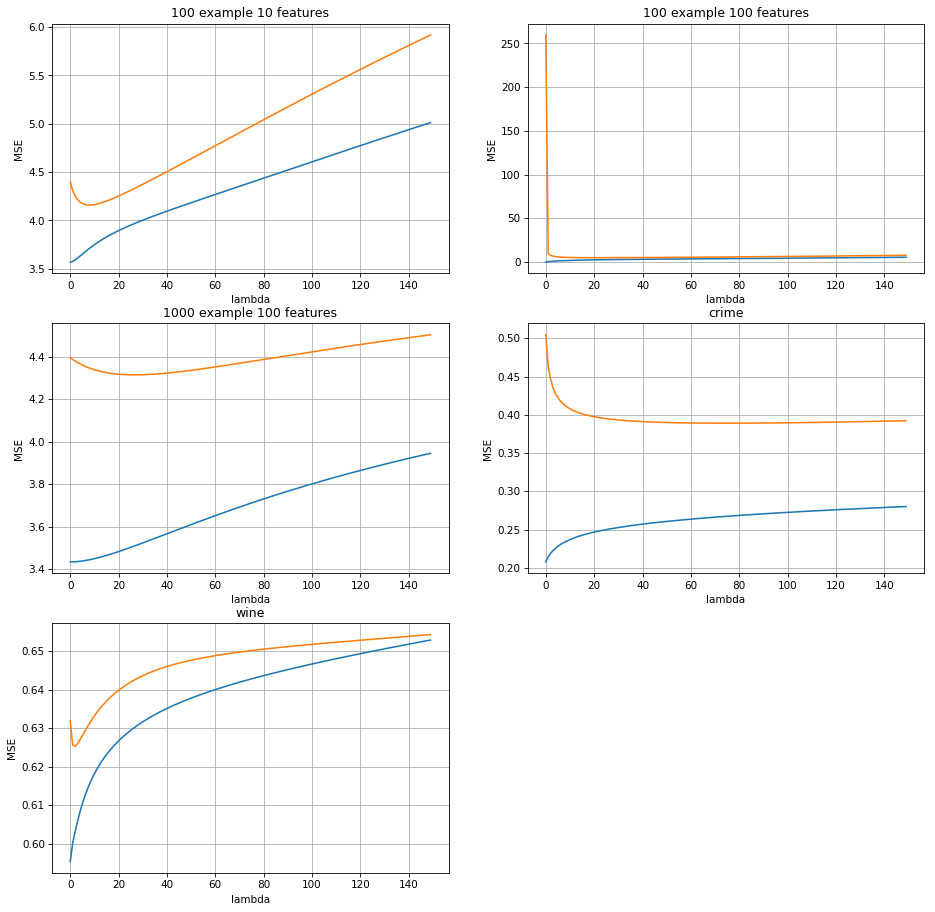

In [348]:
# plot

fig, ax = plt.subplots(nrows=3, ncols=2,figsize=(15,15))

print("Blue line denotes train MSE")
print("Orange line denotes test MSE")

lam_values = list(range(150))
ax[0][0].set_title("100 example 10 features")
ax[0][0].plot(lam_values, train_list_100_10,label="test")
ax[0][0].plot(lam_values, test_list_100_10, label="train")
ax[0][0].set_ylabel('MSE')
ax[0][0].set_xlabel('lambda')
ax[0][0].grid(True)

ax[0][1].set_title("100 example 100 features")
ax[0][1].plot(lam_values, train_list_100_100)
ax[0][1].plot(lam_values, test_list_100_100)
ax[0][1].set_ylabel('MSE')
ax[0][1].set_xlabel('lambda')
ax[0][1].grid(True)

ax[1][0].set_title("1000 example 100 features")
ax[1][0].plot(lam_values, train_list_1000_100)
ax[1][0].plot(lam_values, test_list_1000_100)
ax[1][0].set_ylabel('MSE')
ax[1][0].set_xlabel('lambda')
ax[1][0].grid(True)

ax[1][1].set_title("crime")
ax[1][1].plot(lam_values, train_list_crime)
ax[1][1].plot(lam_values, test_list_crime)
ax[1][1].set_ylabel('MSE')
ax[1][1].set_xlabel('lambda')
ax[1][1].grid(True)

ax[2][0].set_title("wine")
ax[2][0].plot(lam_values, train_list_wine)
ax[2][0].plot(lam_values, test_list_wine)
ax[2][0].set_ylabel('MSE')
ax[2][0].set_xlabel('lambda')
ax[2][0].grid(True)

ax[2][1].set_visible(False)


The get the minimum values for MSE as: 4.1596 (for 100-10), 5.0783 (for 100-100), and 4.3155 (on
1000-100)
The hidden true functions gives the values 3.78 (for 100-10), 3.78 (for 100-100), and 4.015 (on
1000-100)
The values are very close-by. We do not what method degree polynomial LR was used. So, maybe the difference in the value is because the degree is different.

Why can't the training set MSE be used to select lambda?


The training set will give the minimum MSE value when lambda = 0
Regularization term descreases the test MSE by reducing the overfitting. 
When a model overfits then it performs pretty well on the Train set but performs poorly on the test set. 
As lambda increases Train MSE increases and Test MSE descreases. 
So, the training set cannot be used to select the lambda value as it will not provide us the value which will provide us the minimum MSE on test but the min MSE on train (which is 0).


Effect of lambda on the test set: We observe that for the test set as the lambda value increase the MSE descreases initially. However, after a certain value the MSE value increases again. 

This is because regularization prevents overfitting. So, as lambda increase the the model generalizes on the test set and reduces overfitting. However, as the lambda value becomes too large the model starts to underfit and hence the MSE starts increasing again.

How does the choice of the optimal vary with the number of features and number of examples? How do you explain these variations?

As we increase the number of features, the overfitting increase. Hence, lambda term has to increase to account for this. We observe this. As we increase the number of features from 10 to 100, the lambda value increases from 8 to 22. 

As the number of examples increase the overfitting should reduce and hence the lambda should reduce. Although, this makes sense inuitively, we aren't getting this as the lambda term is actually increasing to 27. The reason could be because of the subset of the data selected while creating the datasets.

# TASK 2

We select the small, just right, too large lambda as 5, 27 and 145 based on the results from task 1

In [349]:
# we train on random data sizes from 10 to 800 for the small, just right and large value (10 times to get smooth graph)
# we add the MSE for the test test and then later take an average.
small = 5
right = 27
large = 145

small_list = [0 for i in range(10,801)]
right_list = [0 for i in range(10,801)]
large_list = [0 for i in range(10,801)]

for i in range(10):
    for j in range(10, 801):
        a, train_x, b, train_t = train_test_split(train_x_1000_100, train_t_1000_100, test_size=(j/1000))
        
        
        w = find_w_parameter(train_x, train_t, small)
        #print(len(small_list))
        #print(j-10)
        small_list[j-10] += mean_square_error(test_x_1000_100, w, test_t_1000_100, small)

        w = find_w_parameter(train_x, train_t, right)
        right_list[j-10] += mean_square_error(test_x_1000_100, w, test_t_1000_100, right)

        w = find_w_parameter(train_x, train_t, large)
        large_list[j-10] += mean_square_error(test_x_1000_100, w, test_t_1000_100, large)


In [350]:
for i in range(10,801):
    small_list[i-10] = small_list[i-10]/10
    right_list[i-10] = right_list[i-10]/10
    large_list[i-10] = large_list[i-10]/10
    

Blue line is for small lambda term
Orange line is for just right lambda term
Green line is for large lambda term


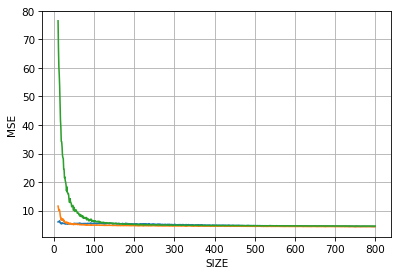

In [351]:
fig, ax = plt.subplots(nrows=1, ncols=1)

print("Blue line is for small lambda term")
print("Orange line is for just right lambda term")
print("Green line is for large lambda term")

train_size = list(range(10, 801))
ax.plot(train_size, small_list)
ax.plot(train_size, right_list)
ax.plot(train_size, large_list)

#ax.plot(train_size, test_list)

ax.set_ylabel('MSE')
ax.set_xlabel('SIZE')

#ax[0].set_xlabel('lambda')

ax.grid(True)

We observe that as the size increases the MSE descreases for all the 3 curves. 
The change is more drastic for the curve with larger lambda value. 

The difference between the MSE for different curves is huge for smaller size of train data. 
However, as we increase the size of the training set the difference becomes smaller and eventually the difference is almost zero.

This is because as we provide more training data, the model learns to generalize better and as a result the overfitting reduces and hence the MSE decreases.


# TASK 3

In [352]:
def iterative_sol(x, y, no_of_iter, degree):
    alpha = 4
    beta = 2
    
    matrix = (x.T).dot(x)
    eigen_val, v = LA.eig(matrix)
    sn = alpha*(np.identity(len(matrix))) + beta*matrix
    mn = beta*(np.dot(np.linalg.inv(sn.values) , (np.dot(x.T, y))))  

    for i in range(no_of_iter):
        gamma = 0
        
        for val in eigen_val:
            gamma += (val*beta)/((val*beta) + alpha) 
        
        #print((np.dot(mn.T,mn)))
        #print("\n")
        alpha = gamma/((np.dot(mn.T,mn)[0][0]))
        #print("y- np"+str(y - np.dot(x, mn)))
        beta = 1/((1/(len(x) - gamma))*np.sum(np.power((y - np.dot(x, mn)), 2))[0])
        sn = alpha*(np.identity(len(matrix))) + beta*matrix
        mn = beta*(np.dot(np.linalg.inv(sn.values), np.dot((x.T), y)))  
    
    N = len(y)
    Emn = (beta/2)*np.power(np.linalg.norm(y - np.dot(x, mn)), 2) + (alpha/2)* np.dot(mn.T, mn)
    
    for ij in range(len(eigen_val)):
        eigen_val[ij] =  eigen_val[ij]*beta + alpha
        
    A = alpha*np.identity(len(matrix)) + matrix.values
    #np.prod(eigen_val)
    evidence = (degree/2)*np.log(alpha) + (N/2)*np.log(beta) - Emn - (1/2)*np.log(np.linalg.det(A)) - (N/2)*np.log((2*math.pi))
    
    return mn, evidence

In [353]:
mn, e = iterative_sol(train_x_100_10, train_t_100_10, 40, 100)
print("100_10")
print("Min from task 1: "+ str(min_mse_100_10))
print("From task 3: " + str(mean_square_error(test_x_100_10, mn, test_t_100_10, 27)))
print("\n")

print("100_100")
mn, e = iterative_sol(train_x_100_100, train_t_100_100, 40, 100)
print("Min from task 1: "+ str(min_mse_100_100))
print("From task 3: " + str(mean_square_error(test_x_100_100, mn, test_t_100_100, 27)))
print("\n")

print("1000_100")
mn, e = iterative_sol(train_x_1000_100, train_t_1000_100, 40, 100)
print("Min from task 1: "+ str(min_mse_1000_100))
print("From task 3: " + str(mean_square_error(test_x_1000_100, mn, test_t_1000_100, 27)))
print("\n")

print("crime")
mn, e = iterative_sol(train_x_crime, train_t_crime, 40, 100)
print("Min from task 1: "+ str(min_mse_crime))
print("From task 3: " + str(mean_square_error(test_x_crime, mn, test_t_crime, 27)))
print("\n")

print("wine")
mn, e = iterative_sol(train_x_wine, train_t_wine, 40, 100)
print("Min from task 1: "+ str(min_mse_wine))
print("From task 3: " + str(mean_square_error(test_x_wine, mn, test_t_wine, 27)))
print("\n")

100_10
Min from task 1: 4.159678509482884
From task 3: 4.180101416454153


100_100
Min from task 1: 5.078299800593809
From task 3: 7.352456223632034


1000_100
Min from task 1: 4.315570630318422
From task 3: 4.3383514636085145


crime
Min from task 1: 0.3890233877134435
From task 3: 0.3911023074734337


wine
Min from task 1: 0.6253088423047095
From task 3: 0.6267462385707705




We can observe the results obtained from the iterative solution are very close to the result of the best test results obtained from the previous task. This is because MAP actually acts as a regularization over the MLE solution (the one from previous task).
So the MAP solution is very close to the regularized MLE solution.

How does the quality depend on the number of examples and features?

As we increase the number of features, the overfitting increase. He the quality will decrease if we do not add more training examples to complensate for it.

As the number of examples increase the overfitting should reduce. As, the model is feed more train data, it is better able to generalize on the test data.


# TASK 4

In [354]:
def basis_fun(x, degree):
    res = pd.DataFrame()
    for i in range(degree + 1):        
        res[i] = (x.pow(i)).values.flatten()
    return res

In [355]:
degree_list = []
degree_list1 = []
evid = []
degree_val = 10
for degree in range(1,degree_val):
    mn1 = find_w_parameter(basis_fun(train_f3, degree), trainR_f3, 0)
    mn, evidence =  iterative_sol(basis_fun(train_f3, degree), trainR_f3, 10, degree)
    evid.append(evidence[0][0])
    degree_list.append(mean_square_error(basis_fun(test_f3, degree), mn, testR_f3, 10))
    degree_list1.append(mean_square_error(basis_fun(test_f3, degree), mn1, testR_f3, 10))


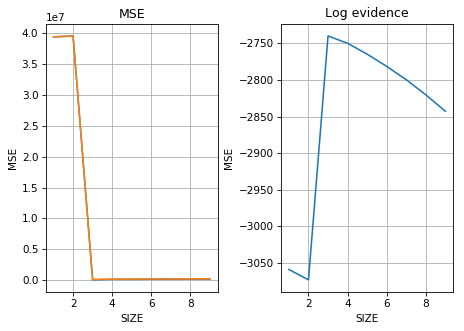

In [356]:
fig, ax = plt.subplots(nrows=1, ncols= 2)
train_size = list(range(1,10))
fig.tight_layout(pad = 0.5, w_pad = 3, h_pad = 3) 
ax[0].plot(train_size, degree_list)
ax[0].plot(train_size, degree_list1)
ax[0].set_title("MSE")
plt.rcParams['figure.dpi'] = 75 
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('SIZE')
ax[0].grid(True )
ax[1].plot(train_size, evid)
ax[1].set_ylabel('MSE')
ax[1].set_title("Log evidence")
ax[1].set_xlabel('SIZE')
ax[1].grid(True)


In [357]:
degree_list = []
degree_list1 = []
evid = []
degree_val = 10
for degree in range(1,degree_val):
    mn1 = find_w_parameter(basis_fun(train_f5, degree), trainR_f5, 0)
    mn, evidence =  iterative_sol(basis_fun(train_f5, degree), trainR_f5, 10, degree)
    evid.append(evidence[0][0])
    degree_list.append(mean_square_error(basis_fun(test_f5, degree), mn, testR_f5, 10))
    degree_list1.append(mean_square_error(basis_fun(test_f5, degree), mn1, testR_f5, 10))


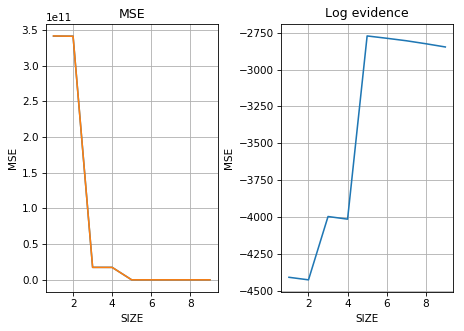

In [358]:
fig, ax = plt.subplots(nrows=1, ncols= 2)
train_size = list(range(1,10))
fig.tight_layout(pad = 0.5, w_pad = 3, h_pad = 3) # Or equivalently,  "plt.tight_layout()
ax[0].plot(train_size, degree_list)
ax[0].plot(train_size, degree_list1)

ax[0].set_title("MSE")

plt.rcParams['figure.dpi'] = 75 # default for me was 75
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('SIZE')
ax[0].grid(True )
ax[1].plot(train_size, evid)
ax[1].set_ylabel('MSE')
ax[1].set_xlabel('SIZE')
ax[1].set_title("Log evidence")
ax[1].grid(True)


We plot the 2 graphs. 1 contains the MSE on the test set using the MAP (mN) for prediction and the non-regularized Linear Regression vs the size. The other graph is the log evidence vs the size. 


We observe that the MSE values from MAP and non-regularized LR are very close in the graph and hence both the curves seem to overlap. 

For both the graphs we obseve that the MSE and log evidence are inversely proportional. As MSE increases, the log evidence descreases. 

For f3 we get the minumum MSE value at degree = 3 at the same point we also get the maximum log evidence.
For f5 we get the minumum MSE value at degree = 5 at the same point we also get the maximum log evidence.

We observe similar trends for the non-regularized LR. 
Hence, the log evidence can be used to select the alpha, beta and degree for the Baysian method. 


Even though, it is given that (Note that evidence is only
relevant for the Bayesian method and one would need some other method to select d in this model

As the graph for both Baysian and LR is simlar we could still select alpha, beta and d using the max log evidence.